<a href="https://colab.research.google.com/github/ismailelbat/BAT/blob/master/Simple_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [127]:
# Create a model that inherits nn.Module
# Input layer with 4 features ,  Output Layer with 3 classes of Iris Layers
# H1 ( hidden Layer 1 with number of neurons), H2 (Hidden Layer 2 with number of neurons),
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__() ####
        self.linear1 = nn.Linear(4, 9)
        self.linear2 = nn.Linear(9, 8)
        self.linear3 = nn.Linear(8, 3)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x


In [128]:
torch.manual_seed(100)
model = Model()

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [130]:
url='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df= pd.read_csv(url)

In [131]:
#Change last colomn from strings to intgers
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

/tmp/ipython-input-3011084818.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [144]:
# Train test, Split data to X and Y
x = my_df.drop('variety', axis=1)
y = my_df['variety']

# Convert thses to numpy arrays
x = x.values
y = y.values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=41)
# Convert numpy to tensors
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)
x_test

tensor([[6.0000, 2.2000, 5.0000, 1.5000],
        [6.4000, 2.8000, 5.6000, 2.1000],
        [7.7000, 3.0000, 6.1000, 2.3000],
        [6.1000, 3.0000, 4.6000, 1.4000],
        [6.8000, 3.0000, 5.5000, 2.1000],
        [6.1000, 2.8000, 4.0000, 1.3000],
        [6.3000, 2.7000, 4.9000, 1.8000],
        [6.0000, 3.4000, 4.5000, 1.6000],
        [6.5000, 3.0000, 5.2000, 2.0000],
        [6.8000, 3.2000, 5.9000, 2.3000],
        [6.1000, 3.0000, 4.9000, 1.8000],
        [5.1000, 3.4000, 1.5000, 0.2000],
        [4.4000, 3.0000, 1.3000, 0.2000],
        [5.0000, 2.3000, 3.3000, 1.0000],
        [5.1000, 3.3000, 1.7000, 0.5000],
        [6.3000, 2.8000, 5.1000, 1.5000],
        [4.8000, 3.1000, 1.6000, 0.2000],
        [6.0000, 2.7000, 5.1000, 1.6000],
        [4.9000, 3.6000, 1.4000, 0.1000],
        [4.5000, 2.3000, 1.3000, 0.3000],
        [5.5000, 2.4000, 3.7000, 1.0000],
        [6.9000, 3.2000, 5.7000, 2.3000],
        [5.0000, 3.5000, 1.6000, 0.6000],
        [4.7000, 3.2000, 1.3000, 0

In [133]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [134]:
# Train Our model
# Eppch ( one run thru all the traning data in the network)
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(x_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())
    if  i % 10 == 0 :
      print(f"Epoch : {i} and Loss : {loss}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



Epoch : 0 and Loss : 1.1978362798690796
Epoch : 10 and Loss : 0.8799579739570618
Epoch : 20 and Loss : 0.559484601020813
Epoch : 30 and Loss : 0.3460221588611603
Epoch : 40 and Loss : 0.20085392892360687
Epoch : 50 and Loss : 0.11367899924516678
Epoch : 60 and Loss : 0.07404282689094543
Epoch : 70 and Loss : 0.05552999675273895
Epoch : 80 and Loss : 0.04585011303424835
Epoch : 90 and Loss : 0.039916977286338806


Text(0.5, 0, 'Epoch')

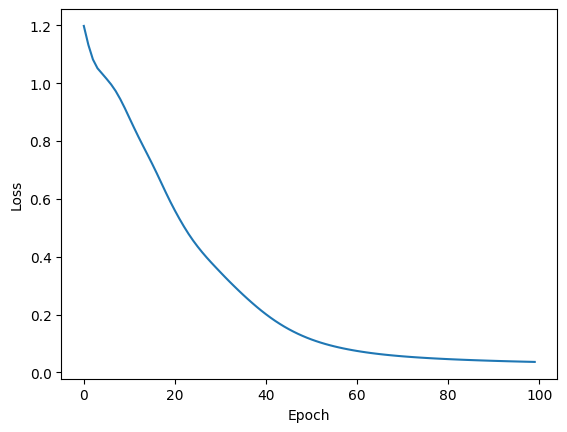

In [135]:
# Graph it out
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [173]:
with torch.no_grad():
    y_eval = model.forward(x_test)
    loss = criterion(y_eval, y_test)

correct = 0
for i, data in enumerate(x_test):
    y_val = model.forward(data)
    print(f'{i+1}. {str(y_val)} \t  {y_val.argmax().item()} \t {y_test[i]}')

    if y_val.argmax().item() == y_test[i].item():
        correct += 1

print(f'Loss: {loss.item()}')
print(f'Correct predictions: {correct}')
print(f'Total test samples: {len(y_test)}')
print(f'Accuracy: {correct / len(y_test):.2f}')

1. tensor([-6.5892,  5.2758,  8.1927], grad_fn=<ViewBackward0>) 	  2 	 2
2. tensor([-10.0208,   5.2145,  13.0486], grad_fn=<ViewBackward0>) 	  2 	 2
3. tensor([-9.9172,  6.0561, 12.8458], grad_fn=<ViewBackward0>) 	  2 	 2
4. tensor([-2.1668,  6.4668,  1.8137], grad_fn=<ViewBackward0>) 	  1 	 1
5. tensor([-8.3245,  5.8196, 10.6096], grad_fn=<ViewBackward0>) 	  2 	 2
6. tensor([ 0.6328,  6.7596, -2.1828], grad_fn=<ViewBackward0>) 	  1 	 1
7. tensor([-5.8918,  5.7697,  7.1628], grad_fn=<ViewBackward0>) 	  2 	 2
8. tensor([-2.1346,  6.6063,  1.7590], grad_fn=<ViewBackward0>) 	  1 	 1
9. tensor([-7.1603,  5.8377,  8.9572], grad_fn=<ViewBackward0>) 	  2 	 2
10. tensor([-10.6873,   5.5571,  13.9811], grad_fn=<ViewBackward0>) 	  2 	 2
11. tensor([-5.6976,  5.8676,  6.8794], grad_fn=<ViewBackward0>) 	  2 	 2
12. tensor([ 14.7770,   8.7110, -22.3379], grad_fn=<ViewBackward0>) 	  0 	 0
13. tensor([ 13.1541,   7.8079, -19.9635], grad_fn=<ViewBackward0>) 	  0 	 0
14. tensor([ 1.5899,  6.0402, -3.47

In [166]:
y_test

tensor([2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0,
        1, 1, 1, 1, 0, 1])

In [172]:

q1 = torch.FloatTensor(x_test[28])
y_val = model.forward(q1)
print(f'{str(y_val)} \t  {y_val.argmax().item()} \t {y_test[28]}')

tensor([ 14.6099,   8.5539, -22.0827], grad_fn=<ViewBackward0>) 	  0 	 0


In [193]:
iris1 = torch.FloatTensor([5.1,3.5,2.4,3.2])
with torch.no_grad():
  print(model(iris1))
  print(f' \t  {model(iris1).argmax().item()} ')

tensor([-3.3196,  5.5557,  3.5626])
 	  1 
